In [2]:
# Name: Zita Lo
# Competition Number: 235642
# Date: December 11, 2025

# Purpose: Evaluate existing risk scoring algorithm


In [3]:
# ------------------------------------------------------------------
# Import Packages
# ------------------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the summary file
df = pd.read_csv('inspection_summary_by_establishment.csv')

# Convert numeric columns
numeric_cols = ['FRANCHISE_LOCATION_COUNT', 'INSPECTION_TIMES', 'VIOLATION_LAST_TWO_COUNT',
                'CRITICAL_LAST_TWO_COUNT', 'VIOLATION_SEVERITY_LAST_TWO_COUNT',
                'DAYS_SINCE_LAST', 'RECENCY_WEIGHT', 'CURRENT_RISK_SCORE']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill NaN for uninspected (just in case something got missed)
df['DAYS_SINCE_LAST'] = df['DAYS_SINCE_LAST'].fillna(9999)
df['CURRENT_RISK_SCORE'] = df['CURRENT_RISK_SCORE'].fillna(3.0)

print(f"Loaded {len(df):,} establishments")
print(f"Uninspected (DAYS_SINCE_LAST = 9999): {(df['DAYS_SINCE_LAST'] == 9999).sum():,}")

# ===================================================================
# 1. BASIC STATISTICS OF CURRENT_RISK_SCORE
# ===================================================================
print("\n" + "="*60)
print("CURRENT RISK SCORE - DESCRIPTIVE STATISTICS")
print("="*60)
print(df['CURRENT_RISK_SCORE'].describe())
print(f"Unique scores: {df['CURRENT_RISK_SCORE'].nunique()}")
print(f"Most common score: {df['CURRENT_RISK_SCORE'].mode()[0]} (appears {df['CURRENT_RISK_SCORE'].value_counts().iloc[0]:,} times)")

# ===================================================================
# 2. CORRELATION ANALYSIS
# ===================================================================
corr_cols = ['CURRENT_RISK_SCORE', 'DAYS_SINCE_LAST', 'RECENCY_WEIGHT',
             'VIOLATION_LAST_TWO_COUNT', 'CRITICAL_LAST_TWO_COUNT',
             'VIOLATION_SEVERITY_LAST_TWO_COUNT', 'INSPECTION_TIMES',
             'FRANCHISE_LOCATION_COUNT']

corr_matrix = df[corr_cols].corr()

print("\n" + "="*60)
print("CORRELATION WITH CURRENT_RISK_SCORE")
print("="*60)
print(corr_matrix['CURRENT_RISK_SCORE'].sort_values(ascending=False).round(3))

Loaded 30,475 establishments
Uninspected (DAYS_SINCE_LAST = 9999): 3,967

CURRENT RISK SCORE - DESCRIPTIVE STATISTICS
count    30475.000000
mean         4.373683
std          1.666499
min          1.000000
25%          3.000000
50%          4.000000
75%          5.500000
max         14.500000
Name: CURRENT_RISK_SCORE, dtype: float64
Unique scores: 27
Most common score: 3.0 (appears 6,537 times)

CORRELATION WITH CURRENT_RISK_SCORE
CURRENT_RISK_SCORE                   1.000
VIOLATION_LAST_TWO_COUNT             0.842
VIOLATION_SEVERITY_LAST_TWO_COUNT    0.786
CRITICAL_LAST_TWO_COUNT              0.753
INSPECTION_TIMES                     0.330
RECENCY_WEIGHT                       0.167
FRANCHISE_LOCATION_COUNT            -0.094
DAYS_SINCE_LAST                     -0.302
Name: CURRENT_RISK_SCORE, dtype: float64


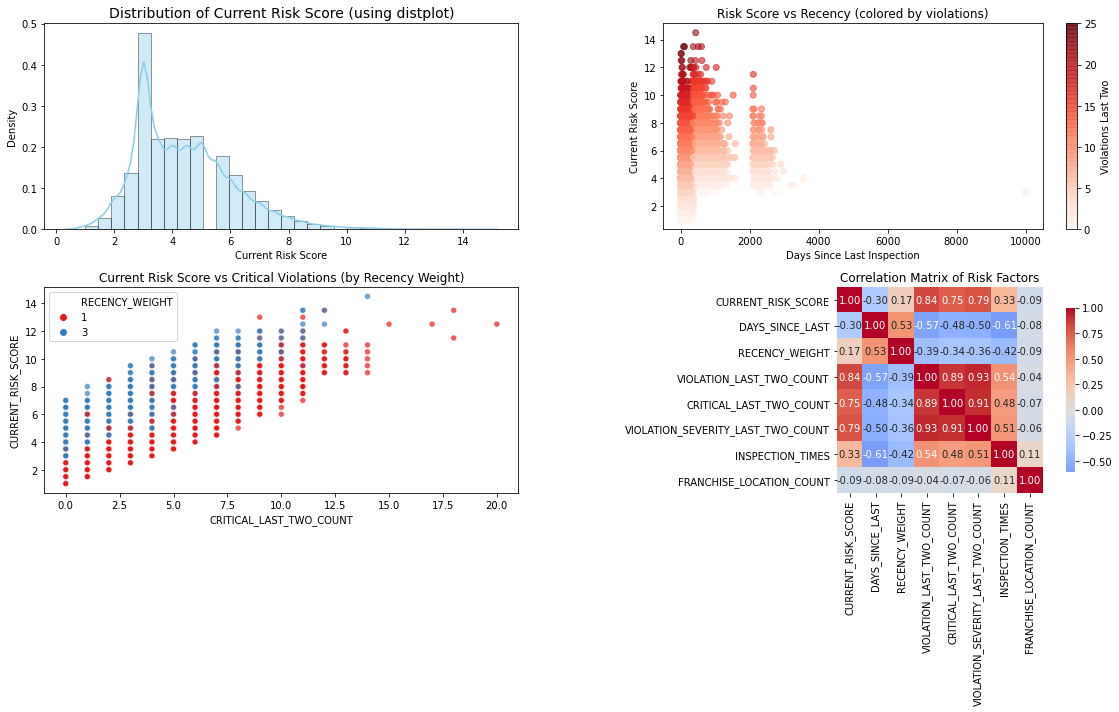

In [4]:
# ===================================================================
# 3. VISUALIZATIONS
# ===================================================================
plt.figure(figsize=(16, 10))

# 3.1 Distribution of Current Risk Score
plt.subplot(2, 2, 1)
sns.distplot(df['CURRENT_RISK_SCORE'].dropna(), 
             bins=30, 
             kde=True, 
             color='skyblue',
             hist_kws={'edgecolor': 'black'})
plt.title('Distribution of Current Risk Score (using distplot)', fontsize=14)
plt.xlabel('Current Risk Score')
plt.ylabel('Density')

# 3.2 Risk Score vs Days Since Last Inspection
plt.subplot(2, 2, 2)
scatter = plt.scatter(df['DAYS_SINCE_LAST'], df['CURRENT_RISK_SCORE'],
                     alpha=0.6, c=df['VIOLATION_LAST_TWO_COUNT'], cmap='Reds')
plt.colorbar(scatter, label='Violations Last Two')
plt.xlabel('Days Since Last Inspection')
plt.ylabel('Current Risk Score')
plt.title('Risk Score vs Recency (colored by violations)')

# 3.3 Risk Score vs Critical Violations
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='CRITICAL_LAST_TWO_COUNT', y='CURRENT_RISK_SCORE',
                hue='RECENCY_WEIGHT', palette='Set1', alpha=0.7)
plt.title('Current Risk Score vs Critical Violations (by Recency Weight)')

# 3.4 Heatmap of Key Correlations
plt.subplot(2, 2, 4)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Risk Factors')

plt.tight_layout()

# Export to png
plt.savefig('Distribution of Current Risk Score.png', 
            format='png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white')
plt.show()

In [5]:
# ===================================================================
# 4. TIE ANALYSIS
# ===================================================================
print("\n" + "="*60)
print("TIE ANALYSIS - HOW MANY ESTABLISHMENTS SHARE THE SAME SCORE?")
print("="*60)
ties = df['CURRENT_RISK_SCORE'].value_counts().sort_values(ascending=False)
print(ties.head(10))

top_score = ties.index[0]
top_count = ties.iloc[0]
print(f"\n→ {top_count:,} establishments share the score {top_score} (rank 1 tie!)")
print(f"→ Only {df['CURRENT_RISK_SCORE'].nunique()} unique scores out of {len(df):,} establishments")


TIE ANALYSIS - HOW MANY ESTABLISHMENTS SHARE THE SAME SCORE?
3.0    6537
5.0    3101
4.0    3035
3.5    3024
4.5    3022
5.5    2452
2.5    1876
6.0    1794
6.5    1283
2.0    1101
Name: CURRENT_RISK_SCORE, dtype: int64

→ 6,537 establishments share the score 3.0 (rank 1 tie!)
→ Only 27 unique scores out of 30,475 establishments


In [6]:
# ===================================================================
# 5. SUMMARY
# ===================================================================
print("\n" + "="*60)
print("KEY FINDINGS FROM EVALUATION")
print("="*60)
print("✓ Simple & fast — easy to compute and explain")
print("✓ Good at flagging uninspected (all get 3.0+)")
print("✗ Heavy clustering — 6,537 establishments tied at 3.0")
print("✗ Only 27 unique scores → poor ranking resolution")
print("✗ Violations weighted equally — critical = non-critical")
print("✗ Binary recency (1 or 3) → no nuance for 366 vs 2000 days overdue")
print("✗ No use of severity, grade, or cuisine risk")

print(f"\nCorrelation Summary:")
print(f"   • Violations Last Two:     {corr_matrix.loc['CURRENT_RISK_SCORE', 'VIOLATION_LAST_TWO_COUNT']:.3f}")
print(f"   • Critical Violations:    {corr_matrix.loc['CURRENT_RISK_SCORE', 'CRITICAL_LAST_TWO_COUNT']:.3f}")
print(f"   • Severity Score:         {corr_matrix.loc['CURRENT_RISK_SCORE', 'VIOLATION_SEVERITY_LAST_TWO_COUNT']:.3f}")
print(f"   • Days Since Last:        {corr_matrix.loc['CURRENT_RISK_SCORE', 'DAYS_SINCE_LAST']:.3f}")

print("\nRecommendation: Build an improved score that:")
print("   • Scales recency gradually")
print("   • Weights critical & severe violations higher")
print("   • Adds grade/cuisine/franchise factors")


KEY FINDINGS FROM EVALUATION
✓ Simple & fast — easy to compute and explain
✓ Good at flagging uninspected (all get 3.0+)
✗ Heavy clustering — 6,537 establishments tied at 3.0
✗ Only 27 unique scores → poor ranking resolution
✗ Violations weighted equally — critical = non-critical
✗ Binary recency (1 or 3) → no nuance for 366 vs 2000 days overdue
✗ No use of severity, grade, or cuisine risk

Correlation Summary:
   • Violations Last Two:     0.842
   • Critical Violations:    0.753
   • Severity Score:         0.786
   • Days Since Last:        -0.302

Recommendation: Build an improved score that:
   • Scales recency gradually
   • Weights critical & severe violations higher
   • Adds grade/cuisine/franchise factors
